In [ ]:
from tensorflow.keras.models import load_model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [44]:
model = tf.keras.models.load_model('F:/Coding stuff/grpPRJ/demo/best.h5')

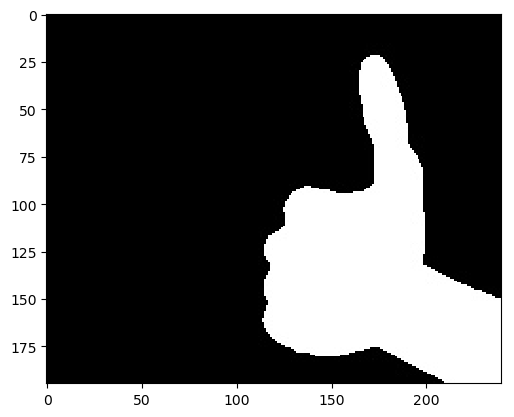

In [67]:
img = cv2.imread('F:/Coding stuff/grpPRJ/demo/test/thumb.jpg')
plt.imshow(img)
plt.show()

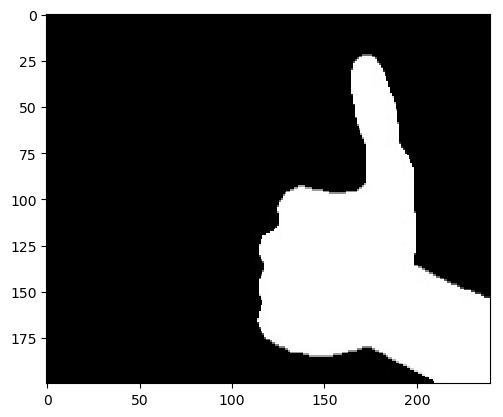

In [68]:
resize = tf.image.resize(img, (200,240))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
# Assuming 'image' is your EagerTensor with shape (None, 200, 240, 3)
grayscale_image = tf.image.rgb_to_grayscale(resize)


In [ ]:
# Replace 'your_directory_path' with the path to your images folder
directory_path = 'F:/Coding stuff/grpPRJ/demo/dataset/HandGesture/images'

# List all subdirectories using os.listdir()
labels = [f.name for f in os.scandir(directory_path) if f.is_dir()]

# Print the list of subfolder names
print(labels)


In [70]:
yhat = model.predict(np.expand_dims(grayscale_image, 0))
yhat
max_position = np.argmax(yhat)
labels[max_position]

1/1 [==============================] - 0s 53ms/step


'thumbs'

In [71]:
len(labels)

7

In [72]:
labels

['okay', 'paper', 'rock', 'rock_on', 'scissor', 'thumbs', 'up']